In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import librosa

FOR TRAIN SET

In [2]:
test_files = glob.glob("d:\\Deep_Learning\\Accentify\\data\\LibreSpeech\\LibriSpeech\\train-clean-100\\**\\**\\*.flac")
len(test_files)

28539

In [3]:
total_duration = 0

for audio in test_files:
    total_duration += librosa.get_duration(path=audio)

In [4]:
total_duration #in secs

362127.16675000126

In [5]:
total_mins = total_duration/60
total_hrs = total_mins/60

print(total_mins)
print(total_hrs)

6035.452779166688
100.59087965277813


In [6]:
duration = []

for audio in test_files:
    duration.append(librosa.get_duration(path=audio))

print('Max Duration: ',max(duration))
print('At Index: ',duration.index(max(duration)))

#for min duration

print('Min Duration', min(duration))
print('At index: ', duration.index(min(duration)))

Max Duration:  24.525
At Index:  24809
Min Duration 1.41
At index:  989


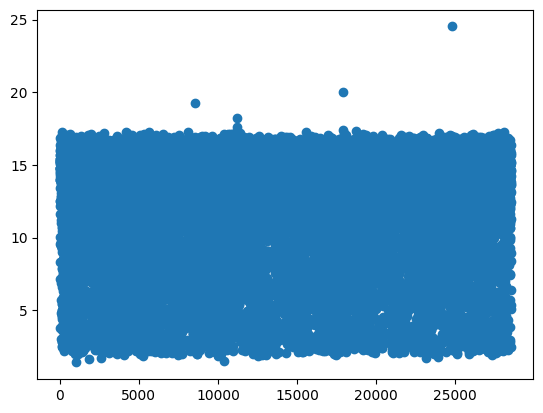

In [7]:
x = np.array(duration)
y=[]
for i in range(28539):
    y.append(i)
plt.scatter(y,x)
plt.show()

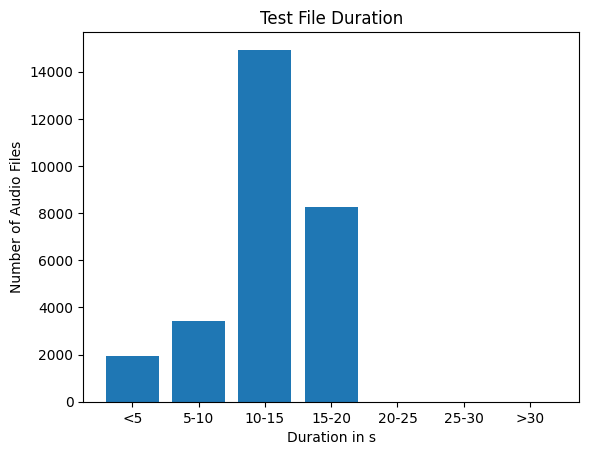

[1940, 3424, 14931, 8243, 1, 0, 0]


In [8]:
under5 = 0
btw5_10 =0
btw10_15 =0
btw15_20=0
btw20_25=0
btw25_30=0
above30=0

for i in duration:
    if (i<5):
        under5+=1
    elif (5<=i<10):
        btw5_10+=1
    elif (10<=i<15):
        btw10_15+=1
    elif (15<=i<20):
        btw15_20+=1
    elif (20<=i<25):
        btw20_25+=1
    elif (25<=i<30):
        btw25_30+=1
    else:
        above30+=1

duration_bar_y = [under5,
btw5_10,
btw10_15,
btw15_20,
btw20_25,
btw25_30,
above30]
duration_bar_x = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '>30'] 

plt.title('Test File Duration')
plt.xlabel('Duration in s')
plt.ylabel('Number of Audio Files')
plt.bar(duration_bar_x,duration_bar_y)
plt.show()
print(duration_bar_y)

In [9]:
usable_time = 0
for audio in test_files:
    time = librosa.get_duration(path=audio)
    if 10<=time:
        usable_time += time

print(usable_time/3600) #in hrs

91.4245115798612


FOR TEST SET

In [40]:
audio_files = glob.glob("d:\\Deep_Learning\\Accentify\\data\\LibreSpeech\\LibriSpeech\\train-clean-100\\**\\**\\*.wav")

In [39]:
len(audio_files)

28539

In [32]:
audio_files[-1]

'd:\\Deep_Learning\\Accentify\\data\\LibreSpeech\\LibriSpeech\\test-clean\\908\\31957\\908-31957-0025.wav'

In [5]:
total_duration = 0

for audio in audio_files:
    total_duration += librosa.get_duration(path=audio)

In [6]:
total_duration #in secs

42712.615499999956

In [17]:
total_duration/len(audio_files)

8.024162220552311

In [7]:
total_mins = total_duration/60
total_hrs = total_mins/60

print(total_mins)
print(total_hrs)

711.8769249999992
11.864615416666654


In [8]:
duration = []

for audio in audio_files:
    duration.append(librosa.get_duration(path=audio))

In [9]:
print('Max Duration: ',max(duration))
print('At Index: ',duration.index(max(duration)))

#for min duration

print('Min Duration', min(duration))
print('At index: ', duration.index(min(duration)))

Max Duration:  34.955
At Index:  3971
Min Duration 2.305
At index:  1395


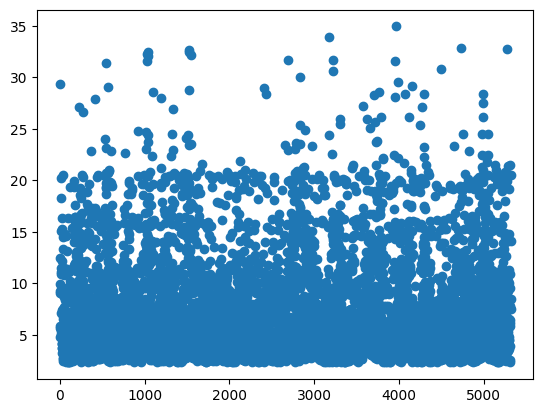

In [10]:
x = np.array(duration)
y=[]
for i in range(5323):
    y.append(i)
plt.scatter(y,x)
plt.show()

(array([2283., 1318.,  736.,  392.,  256.,  244.,   45.,   23.,   15.,
          11.]),
 array([ 2.305,  5.57 ,  8.835, 12.1  , 15.365, 18.63 , 21.895, 25.16 ,
        28.425, 31.69 , 34.955]),
 <BarContainer object of 10 artists>)

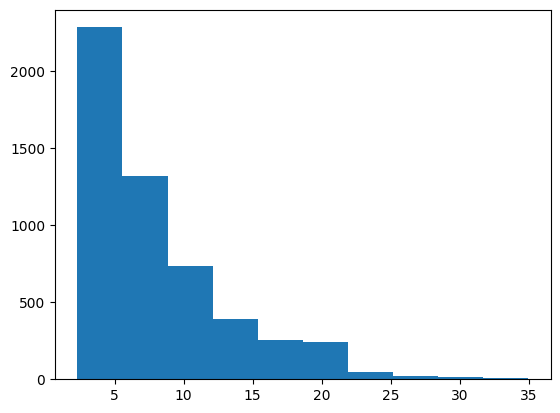

In [11]:
plt.hist(x)


In [12]:
under5 = 0
btw5_10 =0
btw10_15 =0
btw15_20=0
btw20_25=0
btw25_30=0
above30=0

for i in duration:
    if (i<5):
        under5+=1
    elif (5<=i<10):
        btw5_10+=1
    elif (10<=i<15):
        btw10_15+=1
    elif (15<=i<20):
        btw15_20+=1
    elif (20<=i<25):
        btw20_25+=1
    elif (25<=i<30):
        btw25_30+=1
    else:
        above30+=1

    

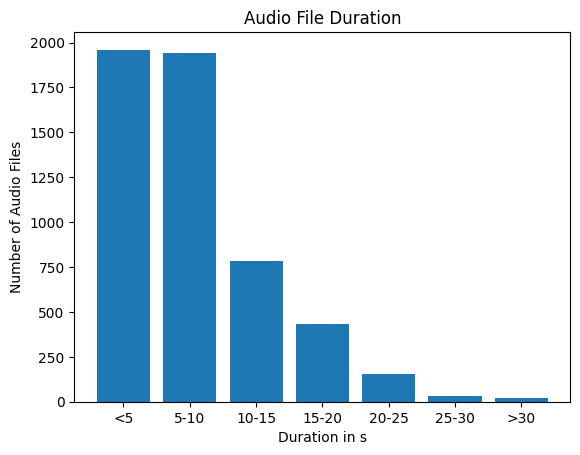

[1960, 1940, 783, 435, 155, 32, 18]


In [16]:
duration_bar_y = [under5,
btw5_10,
btw10_15,
btw15_20,
btw20_25,
btw25_30,
above30]
duration_bar_x = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '>30'] 

plt.title('Audio File Duration')
plt.xlabel('Duration in s')
plt.ylabel('Number of Audio Files')
plt.bar(duration_bar_x,duration_bar_y)
plt.show()
print(duration_bar_y)

TOTAL MALE & FEMALE SPEAKERS

In [14]:
df = pd.read_csv('SPEAKERS.csv', sep='|')

In [15]:
df.columns

Index(['ID  ', 'SEX', ' SUBSET           ', 'MINUTES', ' NAME'], dtype='object')

In [75]:
id = df['ID  '].values
id = id.tolist()
print(id)

[14, 16, 17, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 36, 37, 38, 39, 40, 44, 45, 46, 47, 49, 51, 52, 54, 55, 56, 57, 58, 60, 61, 62, 64, 65, 66, 70, 75, 77, 78, 79, 81, 82, 83, 84, 85, 87, 89, 90, 91, 92, 93, 94, 98, 100, 101, 102, 103, 104, 107, 110, 111, 112, 114, 115, 116, 118, 119, 121, 122, 123, 125, 126, 127, 128, 133, 147, 149, 150, 151, 152, 153, 154, 157, 159, 161, 163, 166, 167, 168, 173, 174, 175, 176, 177, 188, 192, 196, 198, 199, 200, 201, 202, 203, 204, 205, 207, 208, 209, 210, 211, 215, 216, 217, 218, 224, 225, 226, 227, 228, 229, 231, 233, 237, 238, 240, 242, 243, 245, 246, 248, 249, 250, 251, 252, 253, 254, 255, 258, 260, 263, 264, 265, 272, 273, 274, 277, 278, 283, 288, 289, 294, 296, 298, 302, 303, 307, 310, 311, 313, 317, 318, 319, 322, 323, 328, 329, 331, 332, 335, 336, 337, 339, 340, 345, 348, 353, 359, 362, 365, 366, 367, 369, 373, 374, 377, 380, 392, 398, 402, 403, 404, 405, 408, 409, 412, 413, 421, 422, 426, 428, 432, 434, 439, 441, 444, 445, 446, 448, 

In [51]:
sex = df['SEX'].values

In [62]:
sex = df.loc[df['ID  '] == 14, 'SEX'].iloc[0]

' F '

In [67]:
sex = np.array2string(sex)
type(sex)

str

In [68]:
if 'F' in sex:
    print('True')
else:
    print('f')

True


In [100]:
train_speakers = glob.glob("d:\\Deep_Learning\\Accentify\\data\\LibreSpeech\\LibriSpeech\\train-clean-100\\**")
test_speakers = glob.glob("d:\\Deep_Learning\\Accentify\\data\\LibreSpeech\\LibriSpeech\\**\\**")

In [104]:
train_speakers = []
test_speakers = []

os.chdir('d:\\Deep_Learning\\Accentify\\data\\LibreSpeech\\LibriSpeech\\train-clean-100')
train_speakers = os.listdir()

#for test
os.chdir('d:\\Deep_Learning\\Accentify\\data\\LibreSpeech\\LibriSpeech\\test-clean')
test_speakers = os.listdir()

#for dev
os.chdir('d:\\Deep_Learning\\Accentify\\data\\LibreSpeech\\LibriSpeech\\dev-clean')
dev_speakers = os.listdir()
test_speakers.extend(dev_speakers)


print("Total Speakers in Train: ",len(train_speakers))
print("Total Speakers in Test: ",len(test_speakers))

Total Speakers in Train:  251
Total Speakers in Test:  80


In [97]:
print(type(train_speakers[0]))
print(type(id[0]))

<class 'str'>
<class 'int'>


In [110]:
male_train = 0
female_train = 0
male_test = 0
female_test = 0

for i in train_speakers:
    if int(i) in id:
        sex = df.loc[df['ID  '] == int(i), 'SEX'].iloc[0]
        if 'F' in sex:
            female_train += 1
        elif 'M' in sex:
            male_train += 1

for i in test_speakers:
    if int(i) in id:
        sex = df.loc[df['ID  '] == int(i), 'SEX'].iloc[0]
        if 'F' in sex:
            female_test += 1
        elif 'M' in sex:
            male_test += 1

In [111]:
print('Number of Male Speakers in Train: ', male_train)
print('Number of Female Speakers in Train: ', female_train)
print('Number of Male Speakers in Test: ', male_test)
print('Number of Female Speakers in Test: ', female_test)

Number of Male Speakers in Train:  126
Number of Female Speakers in Train:  125
Number of Male Speakers in Test:  40
Number of Female Speakers in Test:  40


In [ ]:
T